# Clasificación binaria mediante **regresión logística**

## Introducción

La regresión logística es uno de los métodos más utilizados para la clasificación. Es un método de clasificación supervisada. Mientras que la regresión lineal utiliza una línea (o un **hiperplano** de tantas dimensiones como variables independientes) para predecir el **valor continuo** de la variable de respuesta, la regresión logística se ajusta a una curva para **predecir la probabilidad** de que la variable de resultado pertenezca a una categoría en particular o no.


In [76]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

En este ejemplo, vamos a analizar los datos de 100 alumnos que solicitaron el acceso a una determinada universidad. El proceso de selección consta de dos exámenes de acceso y una segunda fase de entrevista personal. No tenemos datos que nos permitan cuantificar el desempeño de los alumnos en la entrevista persona, pero sí disponemos de las notas de sus exámenes y si fueron o no admitidos. Consideraremos pues dos variables independientes (las notas de los exámenes) y una variable dependiente (admitido o no admitido).

In [77]:
df = pd.read_csv('data/ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
df.head()

,exam1,exam2,admitted
0,34.623660,78.024693,No
1,30.286711,43.894998,No
2,35.847409,72.902198,No
3,60.182599,86.308552,Yes
4,79.032736,75.344376,Yes


## Regresión logística con una única variable independiente

Para simplificar más, vamos a analizar inicialmente la posibilidad de ser admitido solo en función de una única variable independiente (la nota del primer examen de acceso).

<Axes: title={'center': 'Acceso a la universidad en función de la nota del examen 1'}, xlabel='Nota en el examen 1', ylabel='Acceso'>

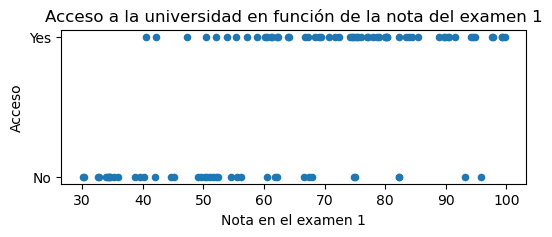

In [78]:
df.plot(kind='scatter', # Creamos un gráfico de dispersión
        x='exam1',       # con 'exam1' en el eje x
        xlabel='Nota en el examen 1',
        y='admitted',    # y 'admitted' en el eje y
        ylabel='Acceso',
        figsize=(6, 2),  # Reducimos el alto del gráfico
        title='Acceso a la universidad en función de la nota del examen 1')

Mostrando todos los datos en un gráfico de dispersión, podemos observar que los alumnos admitidos tienen  en general una nota más alta que los no admitidos, pero que la relación no es lineal, ya que la variable dependiente solo puede tomar dos valores (admitido o no admitido) y no valores continuos.

Aún así, podemos darle a estos datos una interpretación probabilística, entendiendo que la probabilidad de ser admitido aumenta a medida que aumenta la nota del examen. De este modo, podemos buscar una curva que se ajuste a los datos y que nos permita predecir la probabilidad de ser admitido en función de la nota del examen. Una probabilidad de 1 significaría que el alumno es admitido con total seguridad, mientras que una probabilidad de 0 significaría que el alumno no es admitido en absoluto.

Para ello, necesitamos convertir la variable dependiente en una variable continua que represente la probabilidad, y como los datos que tenemos son reales a posteriori, su probabilidad es sabida: aquellos que fueron admitidos ```(df['admitted'] == 'Yes')``` tienen una probabilidad de 1, mientras que aquellos que no fueron admitidos (df['admitido'] == 0) tienen una probabilidad de 0.

In [79]:
# Modificamos los valores de la columna 'admitted' para que sean 0 y 1
df['admitted'] = df['admitted'].map({'No': 0, 'Yes': 1})
# df['admitted'] = df['admitted'].replace('No', 0).replace('Yes', 1) # Otra forma de hacerlo
df.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


En estos casos, la función sigmoide nos permite obtener una curva que se ajusta a los datos, siendo plana en los extremos (probabilidad 0 o 1) y con una pendiente más pronunciada en el centro, dejando una zona de transición entre aquellas donde la probabilidad de ser admitido es alta o muy baja.

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$


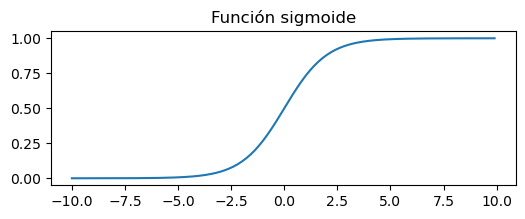

In [80]:
def sigmoid(x): # Función sigmoide
    return 1 / (1 + np.exp(-x))

x = np.arange(-10, 10, 0.1) # Array de ejemplo para la función sigmoide

plt.figure(figsize=(6, 2))
plt.plot(x, sigmoid(x))
plt.title('Función sigmoide')
plt.show()

Esta es la función que utiliza la regresión logística para convertir los datos en una probabilidad. Utilizaremos la clase ```LogisticRegression``` de ```sklearn.linear_model``` para ajustar una curva sigmoide a los datos.

In [81]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(df[['exam1']], df['admitted'])

```df[['exam1']]``` es un DataFrame solo con la columna de las notas del primer examen. Es importante recordar que el método fit de la clase LogisticRegression espera un DataFrame con las variables independientes (ya que normalmente serán más, cada una en su columna), y no un Series. Por eso, utilizamos ```df[['exam1']]``` en lugar de ```df['exam1']```.

Con ese modelo ajustado, podemos obtener predicciones para un nuevo valor, utilizando el método ```predict``` del mismo modo que con la regresión lineal:

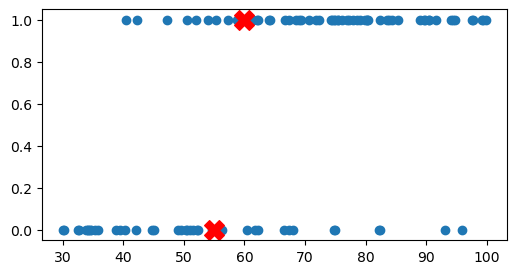

In [82]:
plt.figure(figsize=(6, 3))
plt.scatter(df['exam1'], df['admitted'])
new_grades = pd.DataFrame({'exam1': [55, 60]}) # Creamos un nuevo DataFrame con dos notas
plt.scatter(new_grades, model.predict(new_grades), color='red', marker='X', s=200)
plt.show()

podemos observar como el modelo predice que un alumno con una nota de 55 no será admitido, pero uno con una nota de 60 sí lo será. El modelo está calculando cuál es el punto de corte de la curva sigmoide para determinar si la probabilidad de ser admitido es mayor o menor que 0.5, pero podemos tener más información si en lugar de la predicción directamente, lo que obtenemos es la probabilidad de ser admitido, utilizando el método `predict_proba`.

In [83]:
print(model.classes_) # Clases que ha detectado el modelo

proba_new_grades = model.predict_proba(new_grades)
print(proba_new_grades)

print(proba_new_grades[:,0]+proba_new_grades[:,1]) # La suma de las dos columnas es 1

proba_admit_new_grades = model.predict_proba(new_grades)[:,1]

[0 1]
[[0.5666404 0.4333596]
 [0.465986  0.534014 ]]
[1. 1.]


`predict_proba` nos devuelve un array con tantas columnas como valores posibles de la variable dependiente (las categorías). En este caso las categorías son 0 (no ser admitido) y 1 (ser admitido), como podemos consultar en el atributo `classes_` del modelo, por lo que el array tendrá dos columnas, una con la probabilidad de ser admitido y otra con la probabilidad de no ser admitido (que será su complementario, 1 - probabilidad de ser admitido).

Por tanto, para este caso, la información de las dos columnas es redundante, ya que si la probabilidad de ser admitido es del 80%, la probabilidad de no ser admitido será del 20%, pero normalmente tendremos más de dos categorías, por lo que es importante tener en cuenta que la primera columna del array es la probabilidad de la primera categoría, la segunda columna la probabilidad de la segunda categoría, etc.

   exam1
0     55
1     60
[0.4333596 0.534014 ]


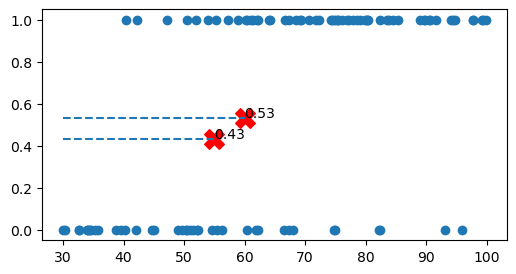

In [84]:
plt.figure(figsize=(6, 3))
plt.scatter(df['exam1'], df['admitted'])
print(new_grades)
print(proba_admit_new_grades)
plt.scatter(new_grades, proba_admit_new_grades, color='red', marker='X', s=200)

for i, txt in enumerate(np.round(proba_admit_new_grades, 2)): # Para cada valor de proba_new_grades, tomo su índice y su valor redondeado
    plt.hlines(y=proba_admit_new_grades[i], xmin=30, xmax=new_grades['exam1'][i], linestyle='--') # Dibujo línea horizontal desde el eje
    plt.annotate(txt, (new_grades['exam1'][i], proba_admit_new_grades[i])) # Anoto el valor en el punto

plt.show()

Creando un array de múltiples posibles valores para X y generando sus probabilidades de ser admitido, podemos representar la curva sigmoide que se ajusta a los datos:

In [85]:
x_sigmoide = np.linspace(30, 100, 1000) # Array de 1000 valores entre 30 y 100 (límites de x que estamos usando)
df_sigmoide = pd.DataFrame({'exam1': x_sigmoide}) # Creamos un nuevo DataFrame esas hipotéticas notas
y_sigmoide = model.predict_proba(df_sigmoide[['exam1']]) # Calculamos los valores de y para esas notas

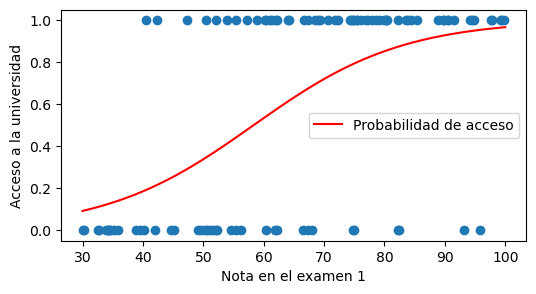

In [86]:
plt.figure(figsize=(6, 3))

plt.plot(x_sigmoide, y_sigmoide[:, 1], 'r-', label='Probabilidad de acceso')

plt.scatter(df['exam1'], df['admitted'])
plt.xlabel('Nota en el examen 1')
plt.ylabel('Acceso a la universidad')
plt.legend()
plt.show()

Podemos además mostrar la probabilidad de la otra categoría (no ser admitido) para ver como la suma de ambas probabilidades es siempre 1.

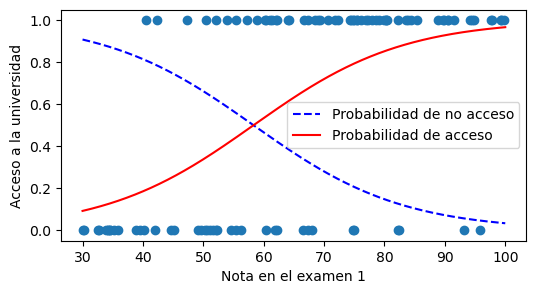

In [87]:
# Podemos además mostrar la probabilidad de la otra categoría (no ser admitido) para ver como la suma de ambas probabilidades es siempre 1.
plt.figure(figsize=(6, 3))
plt.plot(x_sigmoide, y_sigmoide[:, 0], 'b--', label='Probabilidad de no acceso') # Probabilidad de no acceso
plt.plot(x_sigmoide, y_sigmoide[:, 1], 'r-', label='Probabilidad de acceso') # Probabilidad de acceso
plt.scatter(df['exam1'], df['admitted']) # Puntos de los datos reales

plt.xlabel('Nota en el examen 1')
plt.ylabel('Acceso a la universidad')
plt.legend()
plt.show()

## Regresión logística con múltiples variables independientes

Lo normal será calcular esta regresión con las dos notas de los exámenes, ya que es lo que tenemos. En este caso, la curva sigmoide será tridimensional, ya que la probabilidad de ser admitido dependerá de dos variables independientes.

Podemos hacer una primera exploración de los datos visualizándolos con un gráfico de dispersión en el que el color de los puntos nos indique si el alumno fue admitido o no. 

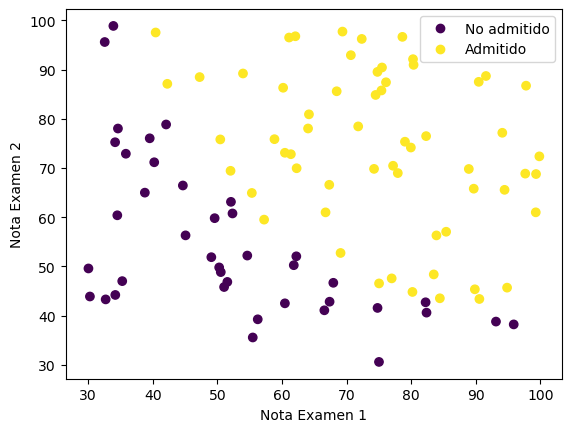

In [88]:
scatter = plt.scatter(df['exam1'], df['exam2'], c=df['admitted']) 
plt.xlabel("Nota Examen 1")
plt.ylabel("Nota Examen 2")
plt.legend(scatter.legend_elements()[0], ['No admitido', 'Admitido'])
plt.show()

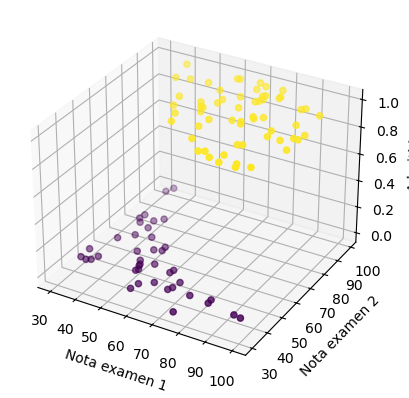

In [89]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x = df['exam1']
y = df['exam2']
z = df['admitted']

scatter = ax.scatter(x, y, z, c=z, cmap='viridis')

ax.set_xlabel('Nota examen 1')
ax.set_ylabel('Nota examen 2')
ax.set_zlabel('Admitido')

plt.show()

Como cabría esperar,los alumnos admitidos tienden a tener notas más altas en ambos exámenes que los no admitidos, pero la relación no es lineal, por lo que la regresión logística es un buen método para ajustar una curva a estos datos.

Si queremos utilizar más de una variable independiente, el proceso es el mismo, pero en lugar de utilizar un DataFrame con una única columna, utilizaremos un DataFrame con tantas columnas como variables independientes tengamos.

In [90]:
X = df.drop(columns='admitted') # Devolvemos dataframe sin la columna 'admitted'
y = df['admitted']

model_multi = LogisticRegression().fit(X, y)

print(model.predict_proba(new_grades)[:,1])
print(model.predict(new_grades))

[0.4333596 0.534014 ]
[0 1]


En lugar de la curva en 3D, podemos representar simplemente en 2D la frontera de decisión (***decision boundary***), que es el lugar donde la probabilidad de ser admitido es del 50%.

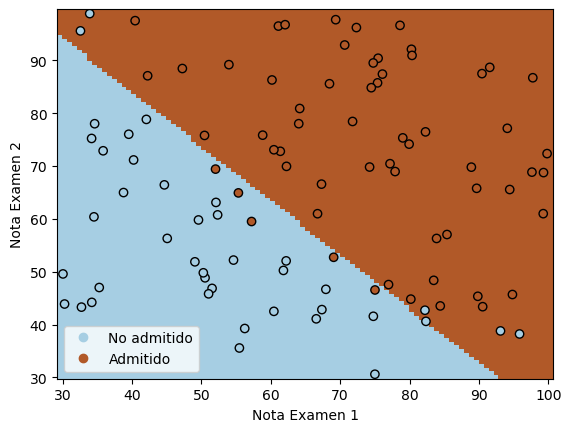

In [91]:
from sklearn.inspection import DecisionBoundaryDisplay

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator( # Creamos un gráfico con la frontera de decisión
    model_multi,
    X,
    cmap='Paired',
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Nota Examen 1",
    ylabel="Nota Examen 2",
    eps=0.5,
)

scatter = plt.scatter(df['exam1'], df['exam2'], c=df['admitted'],
            edgecolors="k",
            cmap=plt.cm.Paired
            ) 

plt.xlabel("Nota Examen 1")
plt.ylabel("Nota Examen 2")
plt.legend(scatter.legend_elements()[0], ['No admitido', 'Admitido'])
plt.show()

## Fuentes y material complementario
- https://aprendeia.com/algoritmo-regresion-logistica-machine-learning-teoria/
- https://cienciadedatos.net/documentos/py17-regresion-logistica-python.html
- https://nbviewer.org/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/ml/ML-Exercise2.ipynb
- https://realpython.com/logistic-regression-python/
- https://cesguiro.es/doku.php?id=clase:ia:saa:2eval:clasificacion_modelos_1